# Dziban Evaluation: Example

## Setup

In [2]:
import pandas as pd
from dziban.mkiv import Chart

In [3]:
df = pd.read_json('./examples/flights-10k.json')

To begin, we can read in our dataframe to create a base.

_Use the Chart constructor to create a base_.

In [4]:
base = Chart(df)

Lets take a look at the fields of our dataset.

_Use the_ get_fields _function to inspect the dataset._

In [5]:
base.get_fields()

['date', 'delay', 'destination', 'distance', 'origin']

## Exploration

As an initial foray, we are interested in the relationship between __distance__ and flight __delay__.

_Create a scatterplot describing this relationship_.

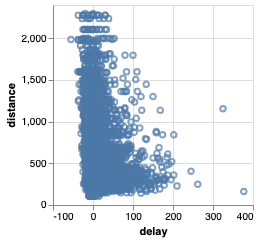

In [6]:
scatter = base.field('distance', 'delay')
# or: scatter = base.x(field='distance').y(field='delay')
scatter

We can hypothesize that __distance__ is a explanatory variable for __delay__.

_If your scatterplot isn't already oriented as such, edit it such that distance appears on the x axis._

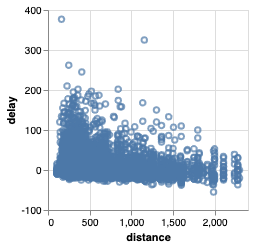

In [6]:
scatter_distance = scatter.x(field='distance')
# or: scatter_distance = scatter.field('distance', channel='x')
scatter_distance

This is better! But there is significant overplotting. Can we clear up the trend?

_There are a few ways of achieving this. One approach is to modify the mark type, but we want to make sure the relationship described is still of attention! Try using_ anchor_on _here._

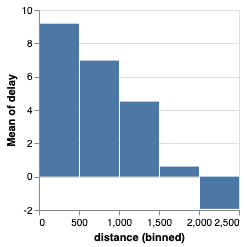

In [7]:
scatter_distance.mark('bar').anchor_on(scatter_distance)
# or: scatter_distance.mark('rect').anchor_on(scatter_distance)

Now lets shift our attention to airports. Are some airports more likely to exhibit _delays_ for _arriving_ flights? 

_Create a visualization displaying destination and delay_.

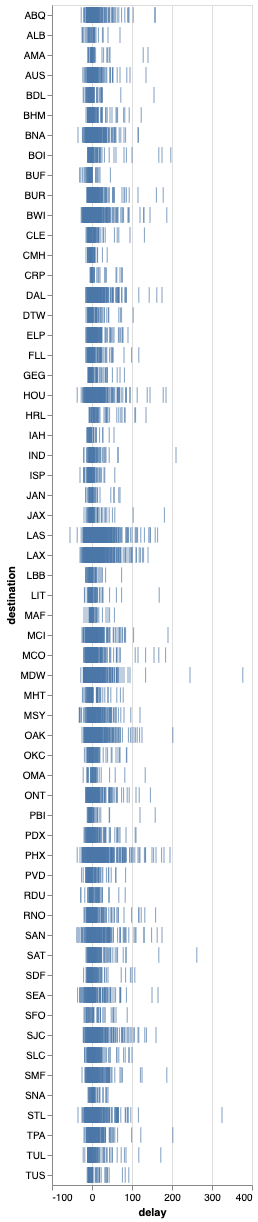

In [8]:
delays_by_destination = base.field('destination', 'delay')
delays_by_destination

A key advantage of notebook visualization is the ability to modify your dataset using a powerful tool like pandas. We are interested in the following airport codes for Seattle (SEA), San Francisco (SFO), Los Angeles (LAX), and San Jose (SJC).

In [9]:
airports = ['SEA', 'SFO', 'LAX', 'SJC']
filtered = df[df['destination'].isin(airports)]

_Apply the visualization above to the new data._

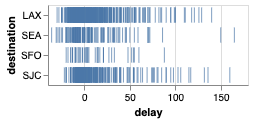

In [17]:
filtered_delays = delays_by_destination.data(filtered)
filtered_delays

While this visualization begins to show a pattern, perhaps looking at a binned view of each airport will give us a better idea of their differences.

_Show instead a series of histograms for each airport_.

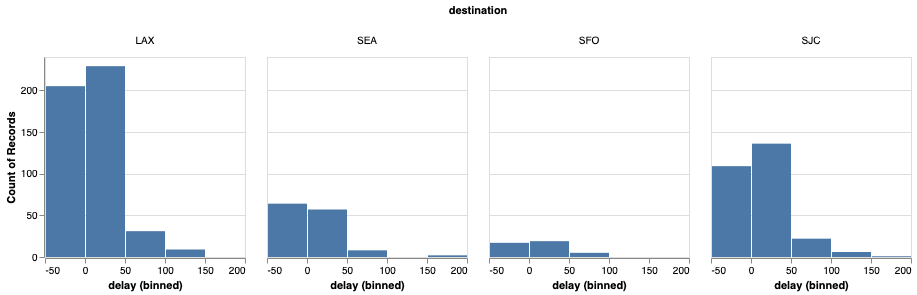

In [26]:
faceted = filtered_delays.field('destination', channel='column').field('delay', bin=True)
# or: faceted = filtered_delays.column(field='destination').field('delay', bin=True)
faceted

Finally, let's unify this visualization with our previous investigation on __distance__ and delay to see if a similar pattern holds for each of these airports.

_Modify the existing visualization to show distance via the color channel._

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


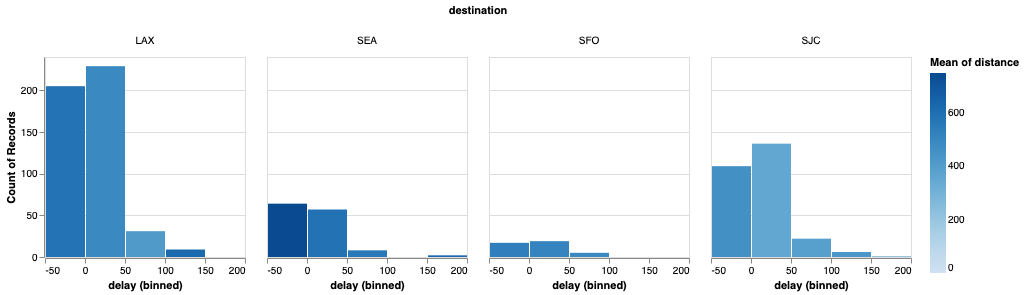

In [28]:
faceted.field('distance', channel='color').anchor_on(faceted)
# or: faceted.color(field='distance').anchor_on(faceted)